<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/FFNetworkUsingPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors
import math 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns 
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder 
from sklearn.datasets import make_blobs 
import torch



In [3]:
torch.manual_seed(0)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

#Generate Dataset

In [0]:
data , labels = make_blobs(n_samples=1000, centers=4, n_features=2,random_state=0)

(1000, 2) (1000,)


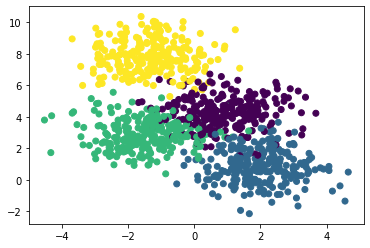

In [6]:
print(data.shape, labels.shape)
plt.scatter(data[:,0], data[:,1],c = labels , )

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state =0 )
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(750, 2) (750,) (250, 2) (250,)


#Torch Implementations

In [8]:
X_train, Y_train, X_val, Y_val = map(torch.tensor,(X_train, Y_train, X_val, Y_val))
print(X_train.shape)

torch.Size([750, 2])


In [0]:
def model(x):
  a1 = torch.matmul(x, weights1) + bias1   # (N,2 ) * (2,2 ) => (N ,2 ) + (1, 2) = > N, 2
  h1 = a1.sigmoid()
  a2 = torch.matmul(h1, weights2) + bias2  # (N,2) * ( 2, 4) = > N , 4 
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)  # -1 is the last axis  dimension ; unsqueeze will make it dimensions 2,1 . this is chaining of the functions. 
  return h2

In [10]:
a = torch.rand(2,4)
print(a.exp())
print(a.exp().sum(-1))
print(a.exp().sum(-1).shape) # this makes tensor of size 2 but we need 1 x2 heence unsqueeze will make is in format we needed.
print(a.exp().sum(-1).unsqueeze(-1)) 
print(a.exp().sum(-1).unsqueeze(-1).shape)

tensor([[1.6426, 2.1559, 1.0925, 1.1411],
        [1.3599, 1.8853, 1.6325, 2.4509]])
tensor([6.0321, 7.3285])
torch.Size([2])
tensor([[6.0321],
        [7.3285]])
torch.Size([2, 1])


In [11]:
y_hat = torch.tensor([[0.1,0.2,0.3,0.4],[0.8, 0.1,0.05,0.05]])
y = torch.tensor([2,0])
y_hat[range(y_hat.shape[0]),y].log().mean()
(torch.argmax(y_hat, dim=1) == y ).float().mean().item()



0.5

In [0]:
def loss_fn(y_hat,y):
  return -(y_hat[range(y.shape[0]),y].log()).mean()

In [0]:
def accuracy(y_hat, y): 
  pred = torch.argmax(y_hat,dim=1)
  return (pred == y).float().mean()

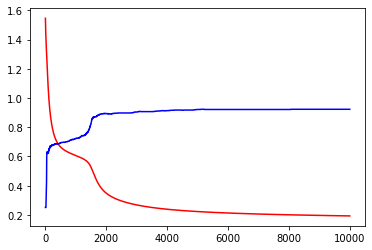

Loss before training 1.5456440448760986
Loss after training tensor(0.9227)


In [21]:
#seed to get repeatability 
torch.manual_seed(0)

#xavier initialization 

weights1 = torch.randn(2,2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2,4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4,requires_grad=True)

learning_rate = 0.2 
epochs = 10000 

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate 
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate

    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr,'r-')
plt.plot(acc_arr,'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', acc_arr[-1])




# NN Functional

In [0]:
import torch.nn.functional as F


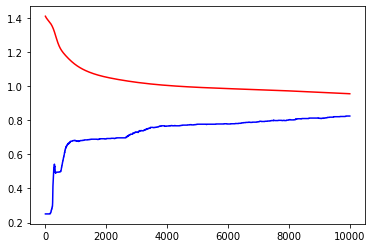

Loss before training 1.4111980199813843
Loss after training 0.9561843276023865


In [24]:
torch.manual_seed(0)

# xavier initialization 
weights1 = torch.randn(2,2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2,4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4,requires_grad=True)

learning_rate = 0.2 
epochs = 10000

loss_arr = []
acc_arr = []

for epoch in range(epochs): 
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat,Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat,Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate

    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr,'b-')
plt.show()
print("Loss before training",loss_arr[0])
print("Loss after training",loss_arr[-1])

#Using NN.Parameter

In [0]:
import torch.nn as nn 

In [0]:
class FirstNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2,2)/ math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2,4)/math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))
  
  def forward(self,X):
    a1 = torch.matmul(X,self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, self.weights2) + self.bias2 
    h2 = a2.exp() / a2.exp().sum(-1).unsqueeze(-1)
    return h2 

In [0]:
def fit(epochs = 1000 , learning_rate =1 ):
  loss_arr = []
  acc_arrr = []
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat,Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    loss.backward()

    with torch.no_grad():
      for param in fn.parameters(): 
        param -= param.grad * learning_rate
      fn.zero_grad()
  plt.plot(loss_arr,'r-')
  plt.plot(acc_arr,'b-')
  plt.show()
  print("Loss before training", loss_arr[0])
  print("Loss after training", loss_arr[-1])

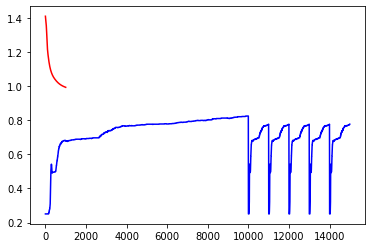

Loss before training 1.4111980199813843
Loss after training 0.9939236044883728


In [41]:
fn =FirstNetwork()
fit()

# Using NN.Linear and Optim

In [0]:
class FirstNetworkLin(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2,2)
    self.lin2 = nn.Linear(2,4)
  
  def forward(self,X):
    a1 = self.lin1(X)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

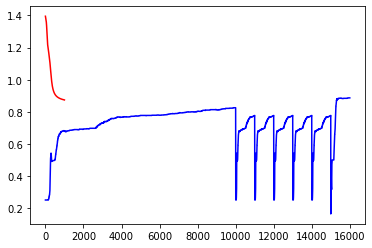

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [45]:
fn = FirstNetworkLin()
fit()

In [0]:
from torch import optim

In [0]:
def fit_optim(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr = learning_rate)

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat,Y_train))
    
    loss.backward()
    opt.step()
    opt.zero_grad()
  
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr,'b-')
  plt.show()
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])
  

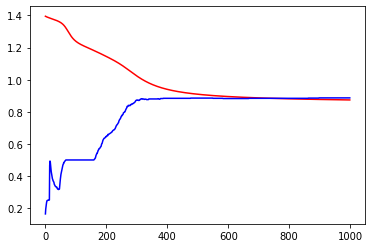

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [54]:
fn = FirstNetworkLin()
fit_optim()